In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.wrappers import SklearnTransformerWrapper

In [2]:
# # load house prices data set from Kaggle

# data = pd.read_csv('houseprice.csv')
# data.head()

# # let's separate into training and testing set

# X_train, X_test, y_train, y_test = train_test_split(
#     data.drop(['Id', 'SalePrice'], axis=1),
#     data['SalePrice'],
#     test_size=0.3,
#     random_state=0)

# X_train.shape, X_test.shape

In [3]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [4]:
cols = [var for var in X_train.columns if X_train[var].dtypes !='O']

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

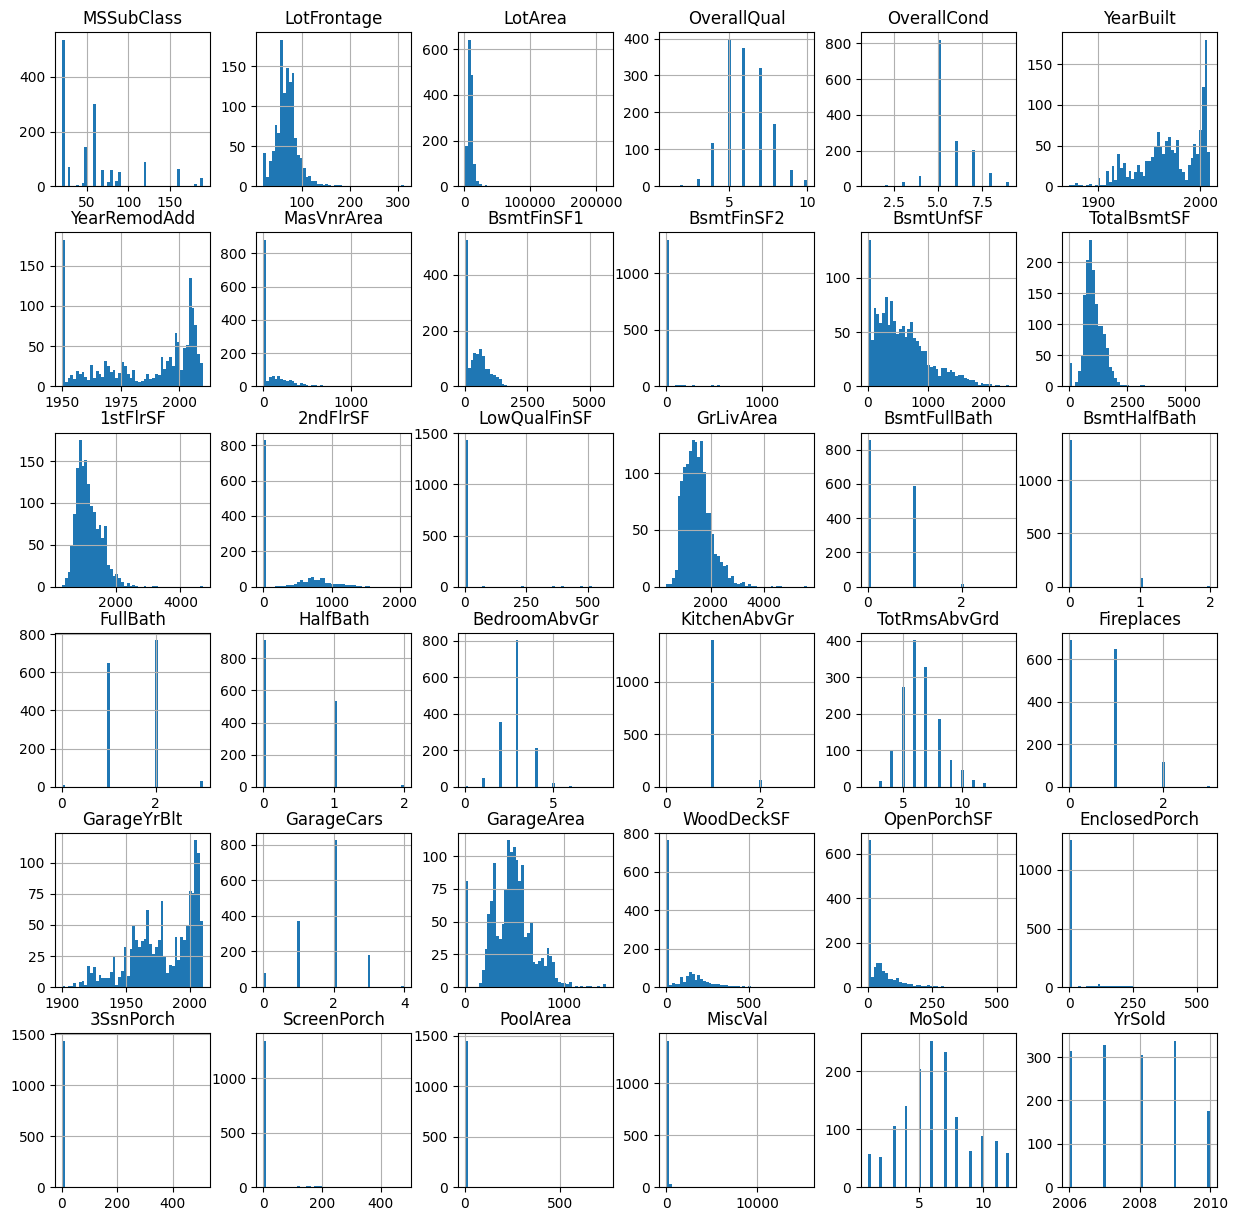

In [5]:
X_train[cols].hist(bins=50, figsize=(15,15))
plt.show()

## KBinsDiscretizer

### Equal-frequency discretization

In [6]:
variables = ['GrLivArea','GarageArea']

X_train[variables].isnull().mean()

GrLivArea     0.0
GarageArea    0.0
dtype: float64

In [7]:
# # at the moment it only works if the encoding in kbinsdiscretizer
# # is set to 'ordinal'

# discretizer = SklearnTransformerWrapper(
#     transformer = KBinsDiscretizer(
#         n_bins=5, strategy='quantile', encode='ordinal'),
#     variables = variables,
# )

# discretizer.fit(X_train)

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create pipeline with imputer and discretizer
discretizer = Pipeline([
    ('imputer', SklearnTransformerWrapper(
        transformer=SimpleImputer(strategy='median'),
        variables=variables
    )),
    ('discretizer', SklearnTransformerWrapper(
        transformer=KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal'),
        variables=variables
    ))
])

# Fit and transform
discretizer.fit(X_train)


Pipeline(steps=[('imputer',
                 SklearnTransformerWrapper(transformer=SimpleImputer(strategy='median'),
                                           variables=['GrLivArea',
                                                      'GarageArea'])),
                ('discretizer',
                 SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal'),
                                           variables=['GrLivArea',
                                                      'GarageArea']))])

In [14]:
# discretizer.variables_

In [15]:
# discretizer.transformer_

In [16]:
# we can find the mean values within the parameters of the
# simple imputer

# discretizer.transformer_.bin_edges_

In [17]:
# remove NA

X_train = discretizer.transform(X_train)
X_test = discretizer.transform(X_test)

In [18]:
X_test['GrLivArea'].value_counts(normalize=True)

GrLivArea
1.0    0.217272
2.0    0.212474
0.0    0.200822
3.0    0.194654
4.0    0.174777
Name: proportion, dtype: float64

In [19]:
X_test['GarageArea'].value_counts(normalize=True)

GarageArea
2.0    0.206991
1.0    0.202193
4.0    0.200822
0.0    0.199452
3.0    0.190541
Name: proportion, dtype: float64

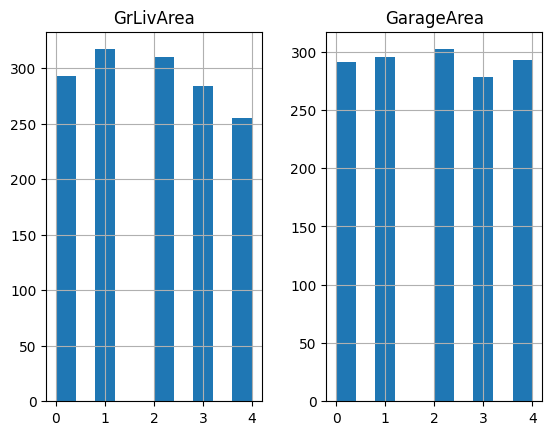

In [20]:
X_test[variables].hist()
plt.show()